# Advanced Plotting

### Note: If you have not completed the Advanced Notebook from Session 1, please do so before continuing.

Over the last two session, you have learned how to read data in, present that data in a variety of different formats. This method of data visualisation is known as exploratory data analysis, as we want to see visually what can be learned from the data before we do further mathematical analysis. To explore these concepts further, we will look at the well known data statistics data set, known as the Fisher Iris Data Set.

The Fisher Iris Data Set are measurements of the lengths and widths of the petals and sepals for 3 different specis of iris. This dataset will allow us to explore and solidify the concepts you have been learning over the last two sessions while introducing some more advanced and powerful data plotting libraries.

<div style="background-color: #00FF00">
    
**Exercise - Open up the dataset "Fisher_iris.csv" (in the 'Data' folder) as a Pandas DataFrame. Use the .info() function to summarise the data and the .head() function to look at the headers and data contained within. Use the .unique function to determine the species of iris in this DataFrame** 

At the end of the last advanced sheet, we saw that we can filter our DataFrame to selectively plot the data contained within. Let's do it again with this DataFrame.
<p>
<div style="background-color: #00FF00">

**Exercise - Plot a histogram of the sepal_width for all 150 iris measurements. Now extract each species into a separate DataFrame and plot the sepal widths of each species on the same histogram to look at how this characteristic varies.**

# Seaborn Statistical Plotting

The package Seaborn provides an attractive way to produce statistical graphs in Python. Seaborn is used for plotting data for the following reasons:

- It is built on top of the Matplotlib package and so contains all of its functionality.
- It is designed to integrate well in Pandas DataFrames.

We import seaborn in the following way:

In [2]:
import seaborn as sns
sns.set()

The sns.set() command loads a predefined pallete for the plots that follow. Look into the documentation to explore the other setups that are available. Seaborn has an incredibly vast and complicated library of plotting functions and talking about all of them would be a whole course itself! We will however review some of the more relevant functions and apply them to our DataFrame. The first is the distribution plot, which is equivalent to a histogram.

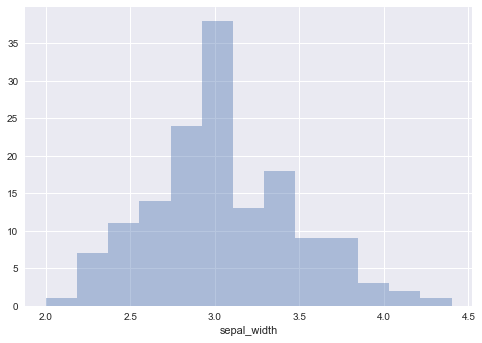

In [3]:
import pandas as pd
df=pd.read_csv('Data/Fisher_iris.csv')
sns.distplot(df['sepal_width'],kde=False)
sns.plt.show()

Notice that we use the keyword arguement kde=False.

<div style="background-color: #00FF00">

**Exercise - What happens if we set kde=True? Look at the documentation, what does the keyword represent? What other keywords are there?**

<div style="background-color: #00FF00">

**Exercise - Using seaborn, plot each sepal_length of each species of iris as a histogram on the same axis.**

## Linear Regression Plots

Before we move onto data visualisation techniques you may not have seen before, let's revisit line plots using seaborn. This is accomplished using the seaborn function lmplot. Let's look at how the the sepal length and sepal width vary with each other.

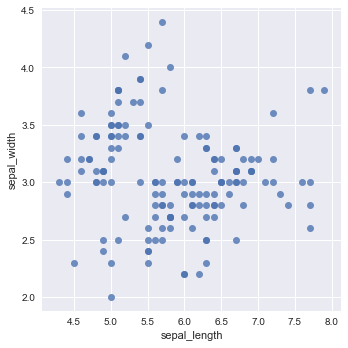

In [4]:
sns.lmplot(x='sepal_length',y='sepal_width',data=df,fit_reg=False)
sns.plt.show()

Look at how we have called the function, we have given it the header titles in the x & y keywords and the DataFrame within the data keyword. We have also specified the keyword fit_reg=False as by default lmplot will attempt to fit a line to the data.
<p>
<div style="background-color: #00FF00">

**Exercise - Create a scatter plot of the sepal_length and width with fit_reg=True. What does the line look like?**

The fit of the above data is very poor due to the spread of the points. However this data consists of 3 different Iris types, each of which may contain their own trends. Being able to look at these types separately is one of the major strengths of Pandas! To do this, we can specify the hue keyword in lmplot. This tells seaborn to group each line according to the value of hue, which in this case is the species column of the DataFrame.
<p>
<div style="background-color: #00FF00">

**Exercise - Create a scatter plot of the sepal_length and width this time with the keyword hue='species'.**

**NOTE**

It is tempting to use lmplot for all your regression fits, as it is produced as standard. There is however one substantial drawback to this approach: It does not tell you the functional form of your fit! Not knowing the slope or the intercept of your fit limits the usefulness of this approach and should only be used for graphically showing trends. If you need any further information then you should stick to fitting your data using scipy!

# Boxplot, violin and Swarm Plots

While histograms are useful for visualising the distribution of data, there are times when we want a succint summary of what the data is trying to represent. We can do this numerically or graphically. To get some basic numerical statistics of the data, we can use the .describe() function on our data as follows:

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The table gives us a top level summary of the data through numbers such as the mean and standard deviation. It also gives us various percentiles of data, which tells us about the range of the data when combined with the min. For example look at the min and 25% percentile for the sepal_length, this tells us 25% of the data lies between 4.3 and 5.1. The 50% percentile tells us the median value of the dataset, i.e. the middle value.

While the numerical statistics are valuable, it doesn't tell the whole story as it has summarised 150 data points by only a handful of numbers. There are various ways to graphically respresent the data that are both informative and aesthetically pleasing. The first of these is the box plot, which graphically summarises the statistics shown in the above table.

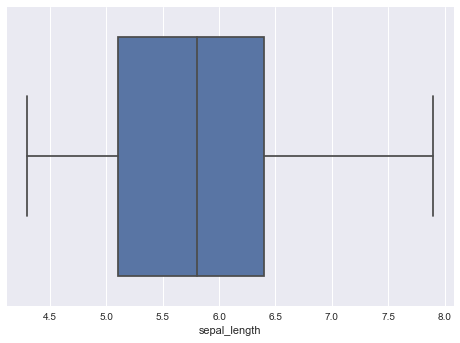

In [6]:
sns.boxplot(x=df['sepal_length'])
sns.plt.show()

Comparing the boxplot to the first column of the table we can see that all of the main statistical information has been imbedded into the graph.
<p>
<div style="background-color: #00FF00">

**Exercise - Reproduce the above boxplot for the sepal width and compare this to the statistics table.**

While a boxplot was good for graphically summarising the major statistics, one part of information that was lost was the number density of points that was represented by a histogram. To look at the distribution of points we use the swarmplot function, which plots all of the data points: 

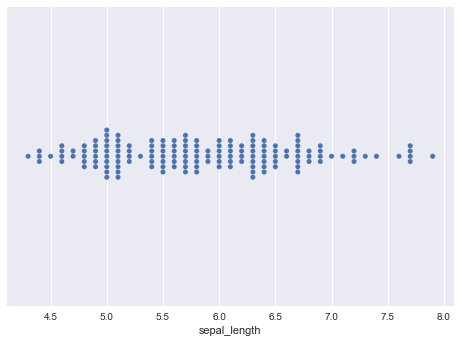

In [7]:
sns.swarmplot(x=df['sepal_length'])
sns.plt.show()

<div style="background-color: #00FF00">

**Exercise - Produce a swarm plot for the sepal_width**

One final type is plot we want to look at this the violinplot. This attempts to combine aspects of a boxplot and a swarmplot by showing important statistical quantities while still representing the number density of data points.

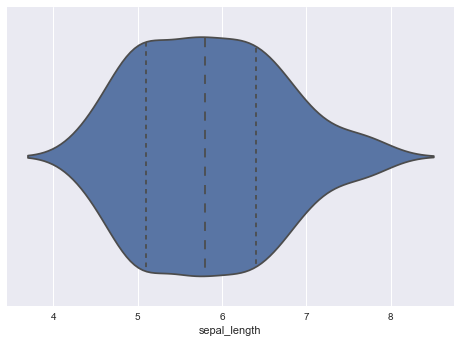

In [8]:
sns.violinplot(x=df['sepal_length'],inner='quartile')
sns.plt.show()

<div style="background-color: #00FF00">

**Exercise - Produce a voilin plot for the sepal_width**

Like the regression plots in the previoues section, each of these plots can be separated into iris species, this time by specifying the species as the x-axis as follows:

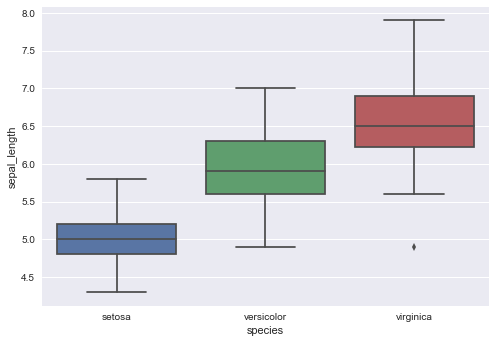

In [9]:
sns.boxplot(x='species',y='sepal_length',data=df)
sns.plt.show()

<div style="background-color: #00FF00">

**Exercise - Create a swarm and violin plot of the sepal_length for each species on the same graph.**

# Visualisation of 2D data

For most of this worksheet, we have concerned ourself with the variation of a single variable (with the exception of regression plots). At scientists we want to see how sets of data together to look for trends or correlations; this is known as multivariate analysis. We will look at a few different ways to present multivariate data. The first way is through the jointplot function, which combines a scatter plot with a histogram of the data along both axes.

For this section, we are focussing on the 'setosa' species only.

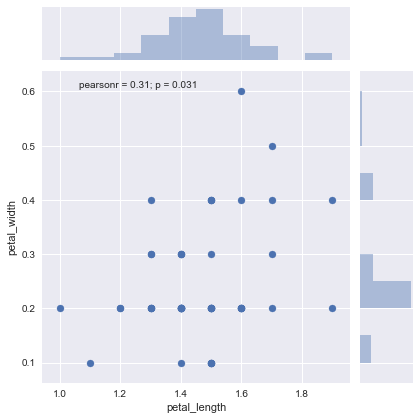

In [11]:
df_seto = df[df['species'] == 'setosa']
sns.jointplot(x='petal_length',y='petal_width',data=df_seto)
sns.plt.show()

Also produced in these plots are statistical summaries: the pearson r-value and the p value. To learn about the meaning to these values, search for them online.

<div style="background-color: #00FF00">

**Exercise - Create a joint plot which plots the sepal_length and sepal_width.**

Instead of plotting individual points, you can instead plot a density of points by using the kind='hex' arguement. This is also known a hexplot.

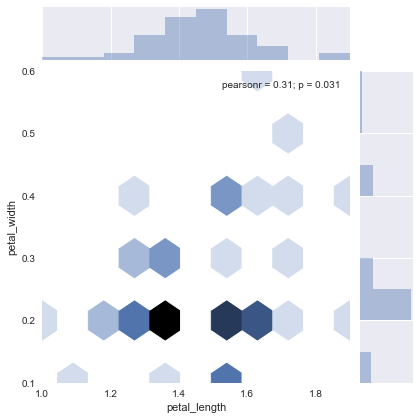

In [12]:
sns.jointplot(x='petal_length',y='petal_width',data=df_seto,kind='hex')
sns.plt.show()

<div style="background-color: #00FF00">

**Exercise - Create a hex plot which plots the sepal_length and sepal_width.**

The final plot we will look at is the pairplot, which allows a summary of an artibrary number of data columns.

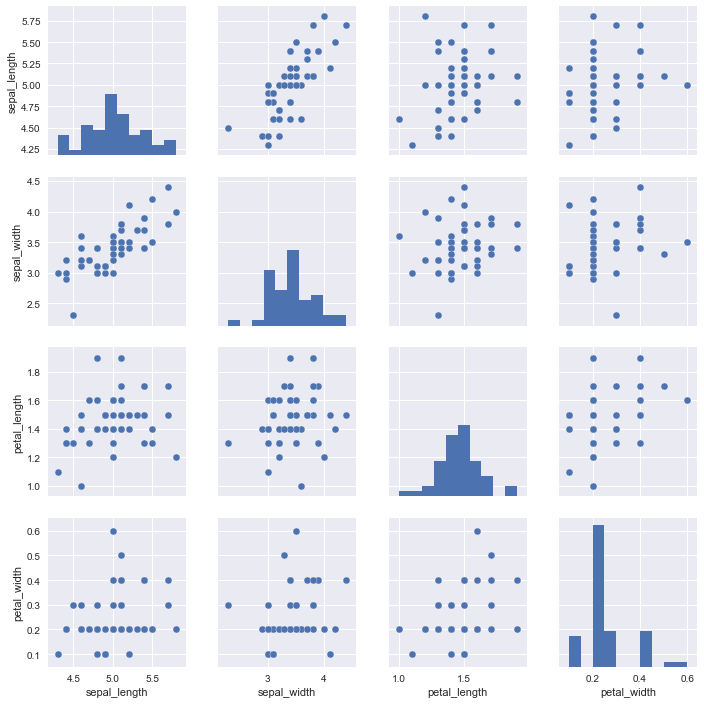

In [13]:
sns.pairplot(data=df_seto)
sns.plt.show()

For each data column in the data, the pairplot function shows how the data varies compared to each other data column (including itself which creates a histogram).

<div style="background-color: #00FF00">

**Exercise - Create a pairplot using the original DataFrame. Can you explain any differences you see between your pairplot and the pairplot of the setosa species only?**